In [41]:
import tensorflow as tf
import numpy as np


In [43]:
!pip install pandas


In [45]:
import pandas as pd

In [47]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
   "New Plant Diseases Dataset/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [48]:
Validation_dataset = tf.keras.utils.image_dataset_from_directory(
   "New Plant Diseases Dataset/valid",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [49]:
training_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [50]:
Validation_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [51]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [52]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [53]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [54]:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [55]:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [56]:
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [57]:
model.add(Dropout(0.25))

In [58]:
model.add(Flatten())
model.add(Dense(1500, activation='relu'))

In [59]:
model.add(Dropout(0.25))

In [60]:
model.add(Dense(38, activation='softmax'))

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [63]:
training_data= model.fit(training_dataset, validation_data=Validation_dataset, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 3447s 2s/step - loss: 1.3423 - accuracy: 0.6026 - val_loss: 0.4725 - val_accuracy: 0.8491
Epoch 2/10
2197/2197 [==============================] - 3154s 1s/step - loss: 0.4480 - accuracy: 0.8569 - val_loss: 0.4204 - val_accuracy: 0.8624
Epoch 3/10
2197/2197 [==============================] - 3198s 1s/step - loss: 0.2729 - accuracy: 0.9100 - val_loss: 0.2886 - val_accuracy: 0.9066
Epoch 4/10
2197/2197 [==============================] - 3149s 1s/step - loss: 0.1847 - accuracy: 0.9393 - val_loss: 0.2258 - val_accuracy: 0.9270
Epoch 5/10
2197/2197 [==============================] - 3146s 1s/step - loss: 0.1383 - accuracy: 0.9536 - val_loss: 0.1471 - val_accuracy: 0.9544
Epoch 6/10
2197/2197 [==============================] - 3147s 1s/step - loss: 0.1110 - accuracy: 0.9631 - val_loss: 0.2220 - val_accuracy: 0.9298
Epoch 7/10
2197/2197 [==============================] - 3157s 1s/step - loss: 0.0876 - accuracy: 0.9708 - val_loss: 0.1365 -

In [64]:
model.save('OneDrive/Final Year Project.h5')

In [65]:
# Evaluation on traing_Dataset
train_loss, train_accuracy = model.evaluate(training_dataset)


2197/2197 [==============================] - 795s 362ms/step - loss: 0.0183 - accuracy: 0.9938


In [66]:
print(train_loss, train_accuracy)

0.01828373596072197 0.9937833547592163


In [67]:
# Evaluation on Validation Dataset
train_loss, train_accuracy = model.evaluate(Validation_dataset)


550/550 [==============================] - 197s 358ms/step - loss: 0.1215 - accuracy: 0.9667


In [68]:
print(train_loss, train_accuracy)

0.12146022170782089 0.9667084217071533


In [69]:
# Saveing model 
model.save("trained_model.h5")
model.save("trained_model.keras")

In [70]:
# checking saved model
training_data.history

{'loss': [1.3422774076461792,
  0.4479685425758362,
  0.27285876870155334,
  0.18466950953006744,
  0.1382804661989212,
  0.1110149696469307,
  0.08763746917247772,
  0.07565878331661224,
  0.0642927810549736,
  0.05810745060443878],
 'accuracy': [0.6026175618171692,
  0.8569315075874329,
  0.9100078344345093,
  0.9393413662910461,
  0.9536097645759583,
  0.9631125926971436,
  0.9707944989204407,
  0.9748488664627075,
  0.978775143623352,
  0.9811224341392517],
 'val_loss': [0.47253814339637756,
  0.4203926920890808,
  0.28855228424072266,
  0.22583366930484772,
  0.14708085358142853,
  0.22203709185123444,
  0.1364937126636505,
  0.14067165553569794,
  0.13882550597190857,
  0.12146016955375671],
 'val_accuracy': [0.8491349816322327,
  0.8623946905136108,
  0.9066128134727478,
  0.9270430207252502,
  0.954359233379364,
  0.9297746419906616,
  0.9569770097732544,
  0.9597086310386658,
  0.9611313343048096,
  0.9667084217071533]}

In [71]:
# Recording history to avoide model training each time 
import json 
with open("traning_history.json","w") as r:
    json.dump("training_data.history",r) # same 


In [72]:
training_data.history['val_accuracy']

[0.8491349816322327,
 0.8623946905136108,
 0.9066128134727478,
 0.9270430207252502,
 0.954359233379364,
 0.9297746419906616,
 0.9569770097732544,
 0.9597086310386658,
 0.9611313343048096,
 0.9667084217071533]

In [73]:
# Graphs 
! pip install seaborn
!pip install matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

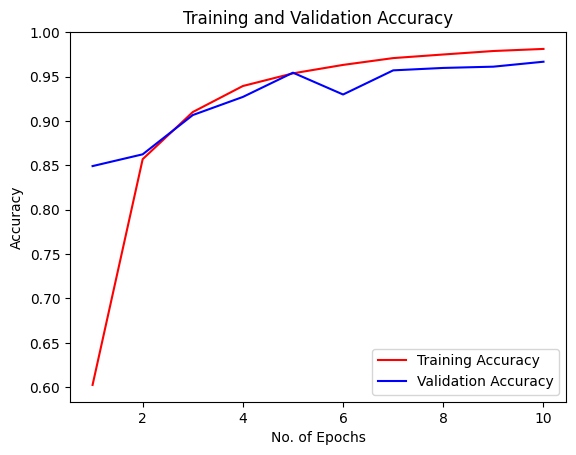

In [89]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 11)]

# Fix the typo in 'accuracy'
plt.plot(epochs, training_data.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_data.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


In [95]:
class_name = Validation_dataset.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [99]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [101]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 250s 453ms/step


(array([[9.99976456e-01, 1.93265787e-05, 2.38117570e-09, ...,
         3.15301916e-15, 1.31042529e-13, 2.26141610e-12],
        [9.99874115e-01, 1.05697414e-04, 1.79415636e-07, ...,
         9.30008848e-12, 1.48917458e-11, 6.07152939e-10],
        [9.99999940e-01, 2.93287368e-08, 1.02420121e-10, ...,
         1.45323206e-16, 2.13745800e-14, 2.68875796e-13],
        ...,
        [1.93470240e-10, 4.82123564e-13, 7.90661687e-08, ...,
         1.06900010e-11, 1.84745858e-10, 9.99996901e-01],
        [6.66069089e-10, 5.79876641e-13, 2.66919375e-08, ...,
         2.59954863e-10, 4.22869240e-10, 9.99999523e-01],
        [4.28801860e-17, 2.45694795e-19, 2.67175129e-16, ...,
         4.25724245e-19, 8.29006974e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [103]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [105]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [107]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [109]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [114]:
!pip install scikit-learn


   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.3 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.3 MB 2.4 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.3 MB 2.6 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.3 MB 2.6 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.3 MB 2.5 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.3 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.3 MB 2.1 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.3 MB 2.1 MB/s eta 0:00:03
   ------------------- -------------------- 4.5/9.3 MB 2.2 MB/s eta 0:00:03
   ---------------------- ----------------- 5.2/9.3 MB 2.3 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.3 MB 2.3 MB/s eta 0:00:02
   -----------------------

In [116]:
import sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.95       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       440
                                   Apple___healthy       0.99      0.94      0.96       502
                               Blueberry___healthy       0.95      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.

In [120]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[463,   9,   0, ...,   0,   0,   0],
       [  0, 485,   0, ...,   0,   0,   0],
       [  0,   0, 419, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 475]], dtype=int64)

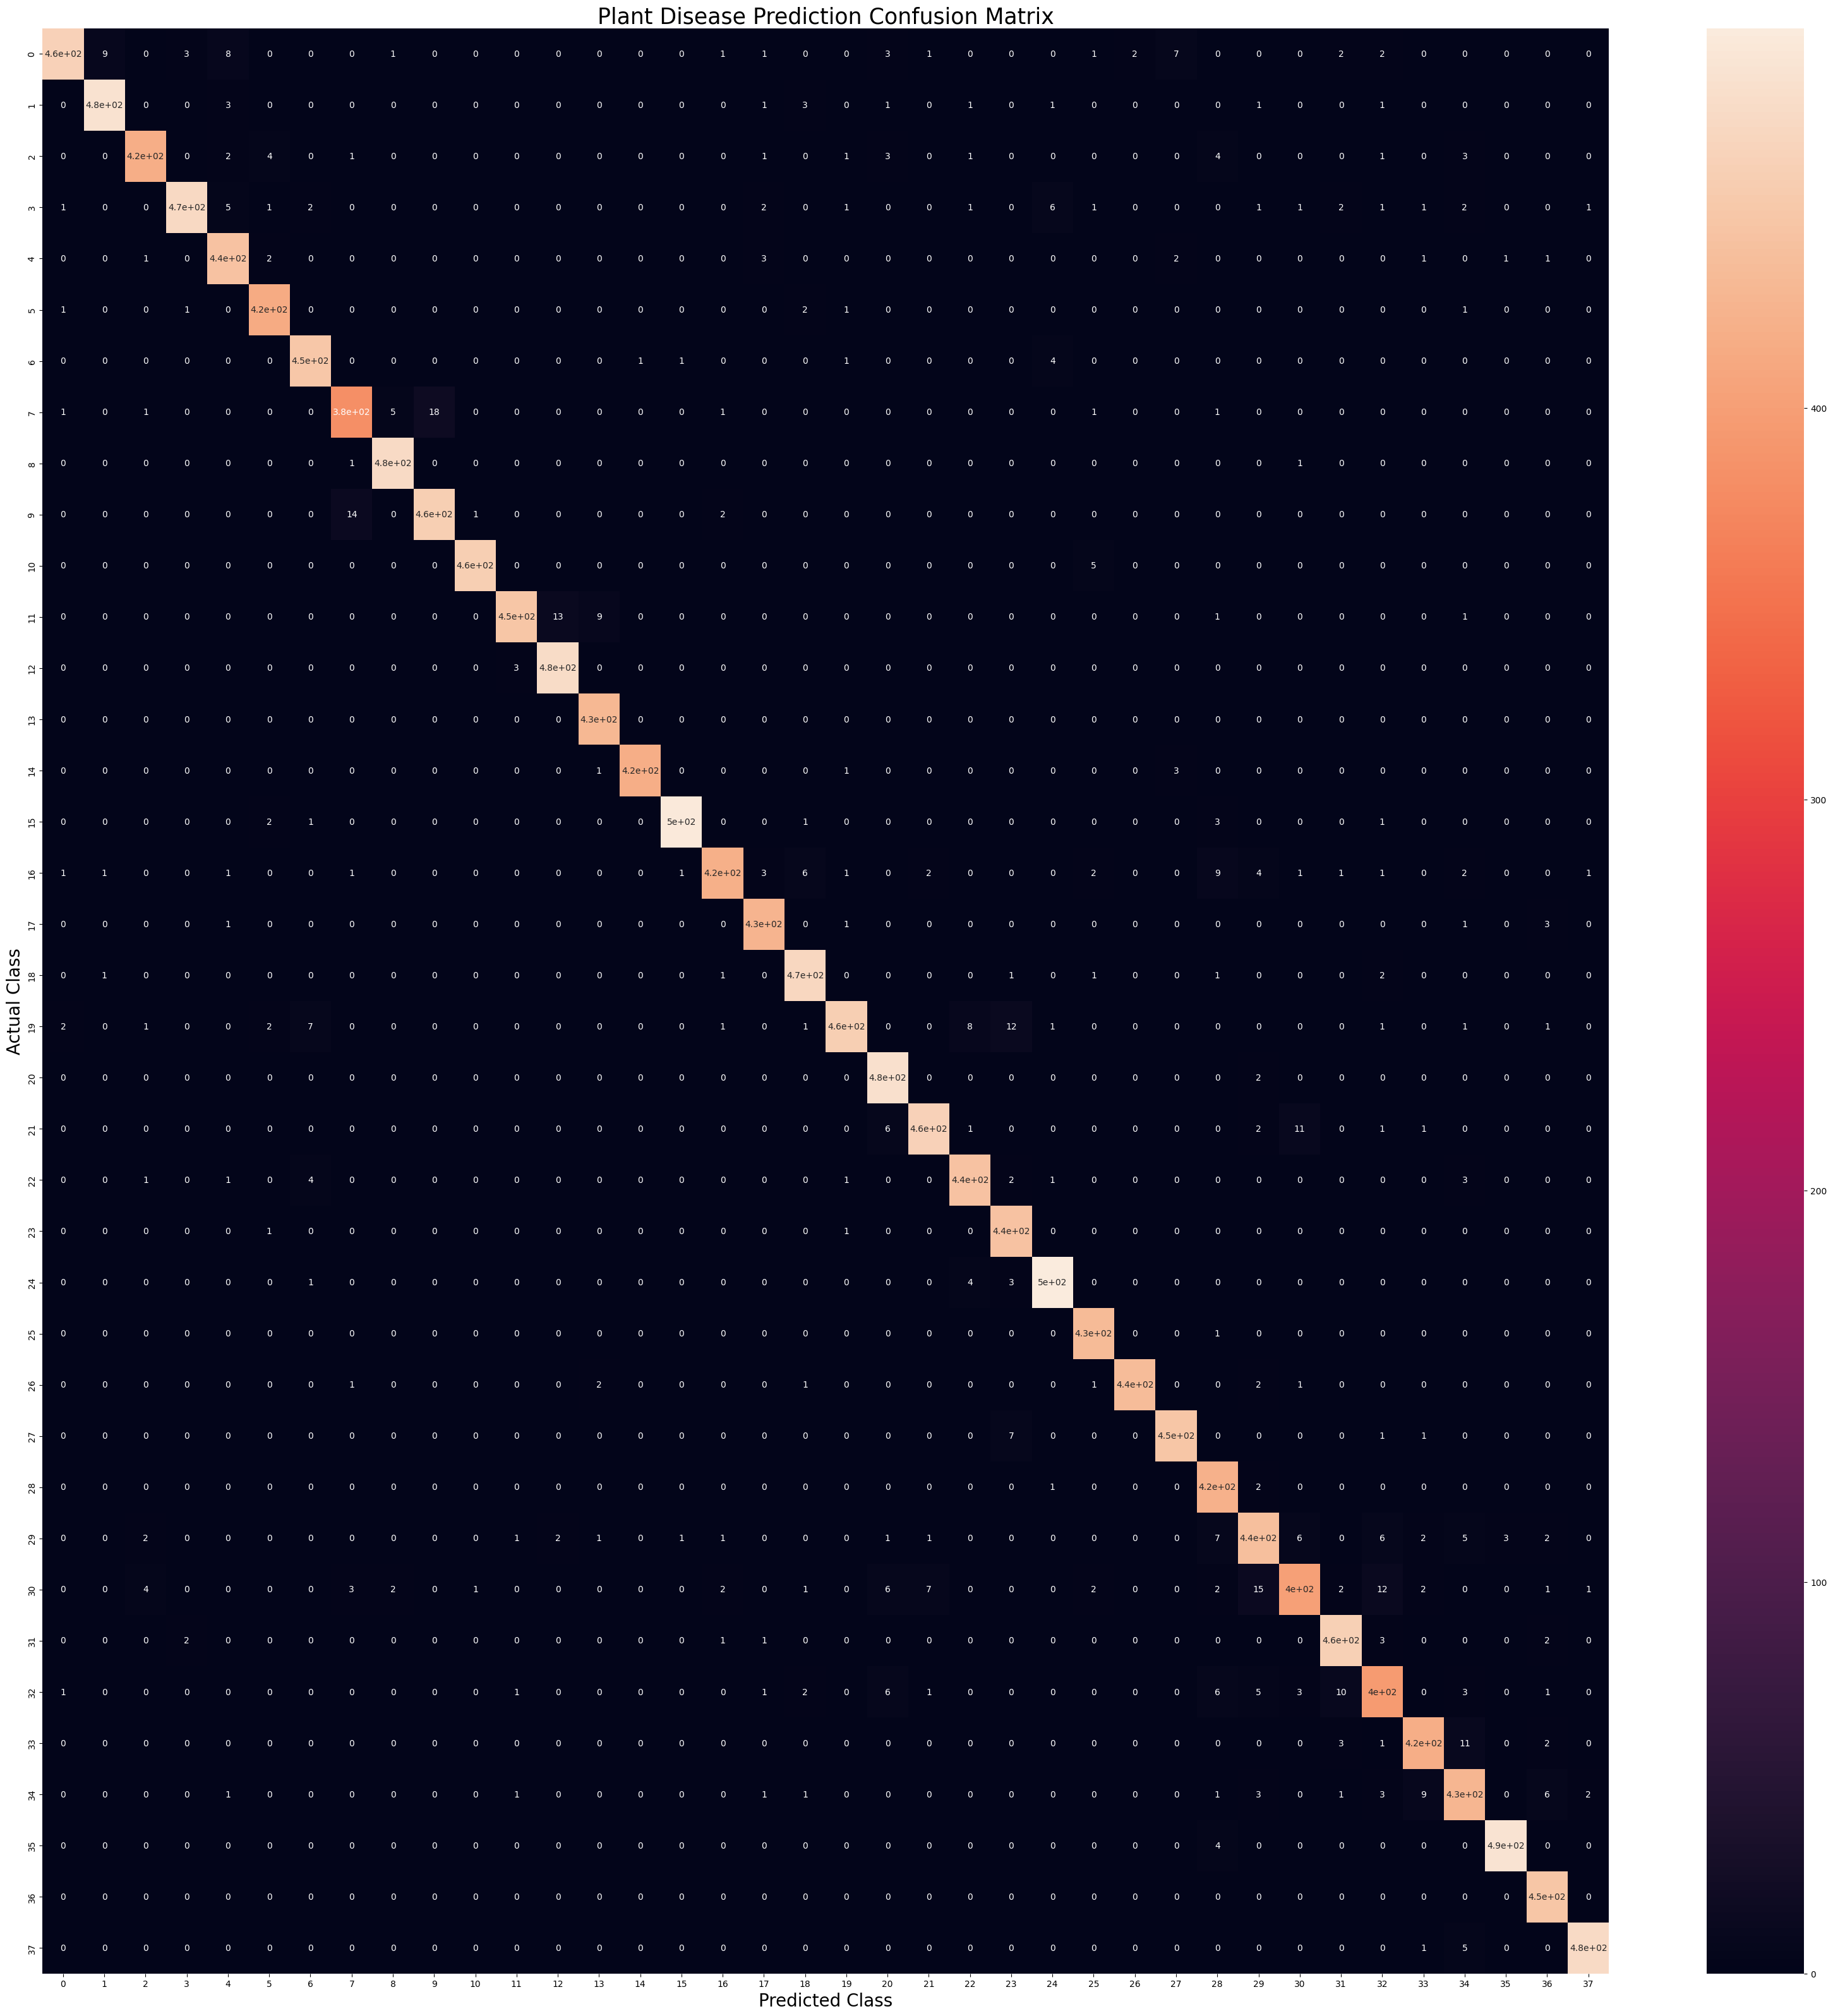

In [122]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()